# Music Predictor
Using this file to predict the genre of a given music file

In [3]:
from music_dealer import MusicDealer
from models import CnnModel, CrnnLongModel, CrnnModel 
import json
from Paras_nb import Para
import os

In [4]:
WEIGHT_PATH = "../model/"
cnn_dealer = MusicDealer(WEIGHT_PATH + "CnnModel_guitar_JohnAll_128.pt", CnnModel())
# crnn_dealer = MusicDealer(WEIGHT_PATH + "CrnnModel.pt", CrnnModel())
# lcrnn_dealer = MusicDealer(WEIGHT_PATH + "CrnnLongModel.pt", CrnnLongModel(), 256)

# Sample Music  Paths

In [5]:
data_path = '../electric_guitar'
genre_path_dict = dict()
label_dict = Para.r_dictionary

for (dirpath, dirnames, filenames) in os.walk(data_path):
    if dirnames:
        for idx, genre in enumerate(dirnames):
            genre_path_dict[genre] = list()
        continue
    else:
        genre = dirpath.split('/')[-1]
        for au_file in filenames:
            if 'mp3' in au_file:
                current_path = dirpath + '/' + au_file
                genre_path_dict[genre].append(current_path)

total_file = sum([len(genre_path_dict[genre]) for genre in genre_path_dict])
# total_file, label_dict, genre_path_dict
total_file

295

In [6]:
def test_model(dealer, save_name):
    test_result = dict()

    for key in genre_path_dict:
        test_result[key] = 0
        # print('test on sample {0}'.format(key))
        for file_name in genre_path_dict.get(key):
            # print(file_name)
            res1, res2, res3, score = dealer.get_genre(file_name)
            if res1 == label_dict.get(key):
                test_result[key] += score.get(res1)
            elif res2 == label_dict.get(key):
                test_result[key] += score.get(res2)
            elif res3 == label_dict.get(key):
                if score.get(res3) is None:
                    continue
                else:
                    test_result[key] += score.get(res3)
            print("*"*99)
        test_result[key] /= (100 * len(genre_path_dict.get(key)))
        print(test_result[key])
        print("+"*99)
    with open(Para.LOG_SAVE_FOLD + save_name, 'w+') as f:
        json.dump(test_result, f)
    return

    

# CNN

In [7]:
test_model(cnn_dealer, 'cnnTest_guitar.json')

/Users/seanlevine/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Genre pop: 100.0%
***************************************************************************************************


/Users/seanlevine/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Genre pop: 100.0%
***************************************************************************************************
Genre pop: 100.0%
***************************************************************************************************
Genre pop: 83.29%
Genre reggae_ska: 16.71%
***************************************************************************************************
Genre pop: 80.04%
Genre classical: 19.96%
***************************************************************************************************
Genre latin: 56.93%
Genre pop: 43.07%
***************************************************************************************************
Genre pop: 72.66%
Genre rock_blues: 16.61%
Genre country_folk: 10.72%
***************************************************************************************************
Genre pop: 100.0%
***************************************************************************************************
Genre pop: 84.5%
Genre reggae_ska: 15.5%
************

In [6]:
# test_model(crnn_dealer, 'crnnTest.json')

test on sample reggae
Test on Shaggy - Oh Carolina 1993 (Official HQ).mp3
Genre blues: 54.42%
Genre hiphop: 19.64%
Genre reggae: 16.68%
Genre pop: 6.96%
Genre disco: 2.29%
***************************************************************************************************
Test on Toots & The Maytals - Do The Reggae.mp3
Genre reggae: 88.05%
Genre blues: 7.78%
Genre country: 2.62%
Genre jazz: 1.55%
***************************************************************************************************
Test on John HoltPolice In Helicopter.mp3
Genre reggae: 89.03%
Genre hiphop: 10.97%
***************************************************************************************************
0.6458689848989448
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test on sample disco
Test on The O'Jays - Love Train.mp3
Genre disco: 56.02%
Genre rock: 37.68%
Genre reggae: 3.31%
Genre metal: 2.99%
***************************************************************

In [7]:
# test_model(lcrnn_dealer, 'lcrnnTest.json')

test on sample reggae
Test on Shaggy - Oh Carolina 1993 (Official HQ).mp3
Genre pop: 73.75%
Genre hiphop: 23.18%
Genre reggae: 3.07%
***************************************************************************************************
Test on Toots & The Maytals - Do The Reggae.mp3
Genre reggae: 96.48%
Genre blues: 3.52%
***************************************************************************************************
Test on John HoltPolice In Helicopter.mp3
Genre reggae: 100.0%
***************************************************************************************************
0.6651951826822047
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test on sample disco
Test on The O'Jays - Love Train.mp3
Genre disco: 97.87%
Genre blues: 2.13%
***************************************************************************************************
Test on I Will Survive.mp3
Genre disco: 83.81%
Genre pop: 16.19%
************************************

# Make Graphs

In [6]:
import matplotlib.pyplot as plt

In [7]:
with open(Para.LOG_SAVE_FOLD + 'cnnTest_guitar.json', 'r') as f:
    cnn = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'crnnTest.json', 'r') as f:
#     crnn = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'lcrnnTest.json', 'r') as f:
#     lcrnn = json.load(f)

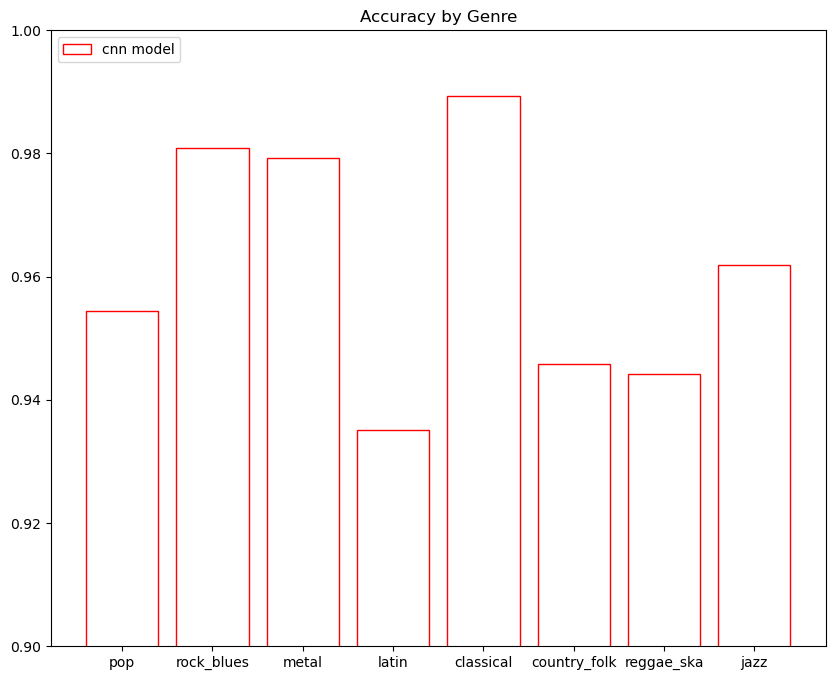

In [9]:
plt.figure(figsize=(10,8))
plt.bar(range(len(cnn)), cnn.values(), 
        align='center', 
        color= (0,0,0,0),
        edgecolor = 'r',
        label='cnn model')

# plt.bar(range(len(crnn)), crnn.values(), 
#         align='center', 
#         color=(0,0,0,0),
#         edgecolor = 'b',
#         label='crnnI model')

# plt.bar(range(len(lcrnn)), lcrnn.values(), 
#         align='center', 
#         color=(0,0,0,0),
#         edgecolor = 'g',
#         label='crnnII model')

plt.xticks(range(len(cnn)), cnn.keys())
plt.legend(loc="upper left")
plt.title("Accuracy by Genre")
plt.ylim((0.9,1.0))
plt.show()